In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import requests

# data collection

In [2]:
now = datetime.now()

start = datetime(now.year-10 , now.month , now.day)
end = now
ticker = "AAPL"
df = yf.download(ticker , start , end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000
2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000
2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000
2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800
2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200
...,...,...,...,...,...
2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400
2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000
2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000
2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000
2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800
2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400
2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800
2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500
2026-01-21,247.649994,251.559998,245.179993,248.699997,54446100


In [5]:
df.columns = [
    '_'.join(col).replace('_AAPL', '') if isinstance(col, tuple) else col
    for col in df.columns
]

# data exploration and Visualization

In [6]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000
2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000
2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000
2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800
2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200
...,...,...,...,...,...
2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400
2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600
2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(2514, 5)

In [9]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [10]:
df.describe()

,Close,High,Low,Open,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,115.516414,116.664028,114.259670,115.413695,1.007221e+08
std,73.781667,74.489636,73.013817,73.725909,5.696847e+07
min,20.604080,20.907416,20.405658,20.526535,1.791060e+07
25%,41.866692,42.087725,41.527807,41.837879,6.096958e+07
50%,121.845753,123.093849,120.077246,121.669179,8.819755e+07
75%,172.125774,174.189220,171.034196,172.100778,1.230082e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [11]:
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [12]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000
2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000
2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000
2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800
2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200


In [13]:
df.index

DatetimeIndex(['2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27',
               '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02',
               '2016-02-03', '2016-02-04',
               ...
               '2026-01-07', '2026-01-08', '2026-01-09', '2026-01-12',
               '2026-01-13', '2026-01-14', '2026-01-15', '2026-01-16',
               '2026-01-20', '2026-01-21'],
              dtype='datetime64[ns]', name='Date', length=2514, freq=None)

In [14]:
df = df.reset_index()

In [15]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200


In [16]:
df.shape

(2514, 6)

Text(0, 0.5, 'Close price')

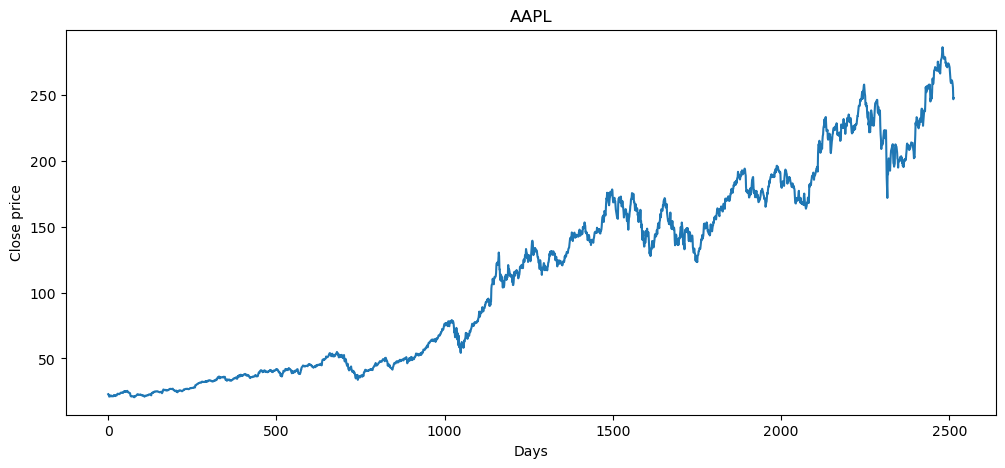

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# Feature engineering

### 100 days moving average

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000,NaN
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000,NaN
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000,NaN
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800,NaN
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200,NaN
...,...,...,...,...,...,...,...
2509,2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400,259.999339
2510,2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600,260.306045
2511,2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800,260.591945
2512,2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500,260.768066


In [19]:
df.head(103)

,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000,NaN
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000,NaN
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000,NaN
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800,NaN
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200,NaN
...,...,...,...,...,...,...,...
98,2016-06-13,22.200577,22.606547,22.145840,22.508476,152082000,NaN
99,2016-06-14,22.227955,22.460590,22.066024,22.196025,127727600,22.728586
100,2016-06-15,22.154976,22.444629,22.129888,22.310065,117780800,22.721465
101,2016-06-16,22.248482,22.294096,21.910934,21.997601,125307200,22.719743


Text(0, 0.5, 'price')

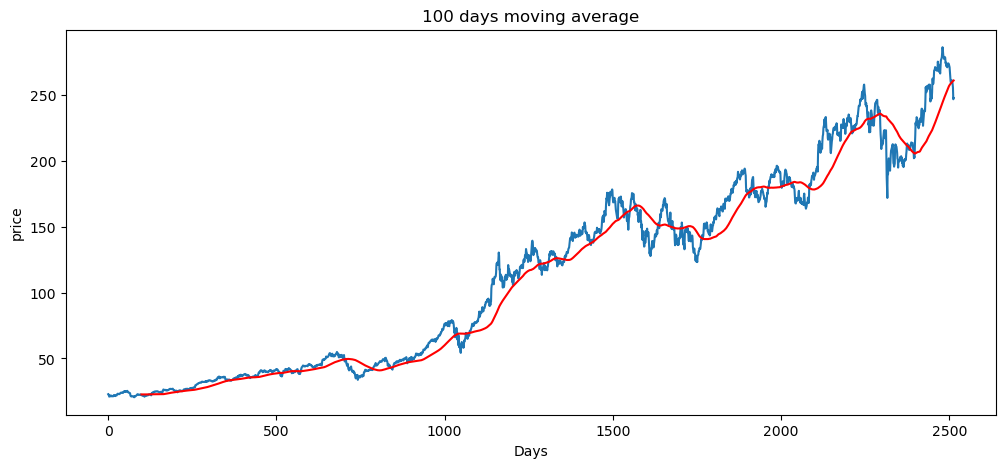

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] , 'r')
plt.title('100 days moving average')
plt.xlabel('Days')
plt.ylabel('price')

### 200 days moving average

In [21]:
df['MA_200'] = df.Close.rolling(200).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000,NaN,NaN
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000,NaN,NaN
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000,NaN,NaN
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800,NaN,NaN
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400,259.999339,233.402203
2510,2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600,260.306045,233.586388
2511,2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800,260.591945,233.751891
2512,2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500,260.768066,233.869756


In [22]:
df.head(203)

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000,NaN,NaN
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000,NaN,NaN
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000,NaN,NaN
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800,NaN,NaN
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-02,25.588490,25.762764,25.505940,25.544922,113326800,24.417939,NaN
199,2016-11-03,25.314217,25.689907,25.249681,25.579275,107730400,24.448802,23.588694
200,2016-11-04,25.086029,25.411014,24.917776,25.014579,123348000,24.478112,23.599789
201,2016-11-07,25.447901,25.470949,25.228939,25.371840,130240000,24.510107,23.614925


Text(0, 0.5, 'price')

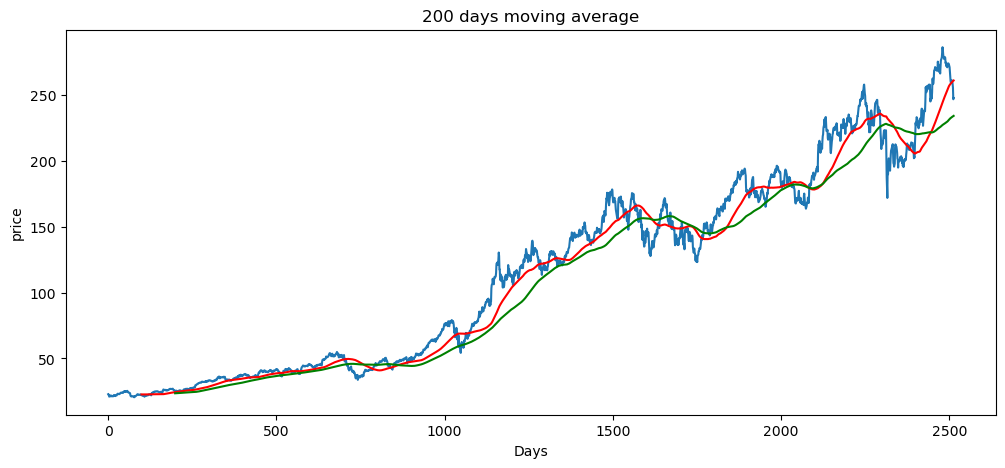

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] , 'r')
plt.plot(df['MA_200'] , 'g')
plt.title('200 days moving average')
plt.xlabel('Days')
plt.ylabel('price')

In [24]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-22,22.867064,22.876082,22.179384,22.238005,263202000,NaN,NaN
1,2016-01-25,22.420639,22.891868,22.368780,22.889613,207178000,NaN,NaN
2,2016-01-26,22.544641,22.745309,22.111741,22.531114,300308000,NaN,NaN
3,2016-01-27,21.063309,21.787064,21.045271,21.654038,533478800,NaN,NaN
4,2016-01-28,21.214373,21.311324,20.831076,21.146733,222715200,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2026-01-14,259.959991,261.820007,256.709991,259.489990,40019400,259.999339,233.402203
2510,2026-01-15,258.209991,261.040009,257.049988,260.649994,39388600,260.306045,233.586388
2511,2026-01-16,255.529999,258.899994,254.929993,257.899994,72142800,260.591945,233.751891
2512,2026-01-20,246.699997,254.789993,243.419998,252.729996,80267500,260.768066,233.869756


### calculate % change in each trading session

In [25]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close' , 'Percentage Changed']]

,Close,Percentage Changed
0,22.867064,NaN
1,22.420639,-0.019523
2,22.544641,0.005531
3,21.063309,-0.065707
4,21.214373,0.007172
...,...,...
2509,259.959991,-0.004175
2510,258.209991,-0.006732
2511,255.529999,-0.010379
2512,246.699997,-0.034556


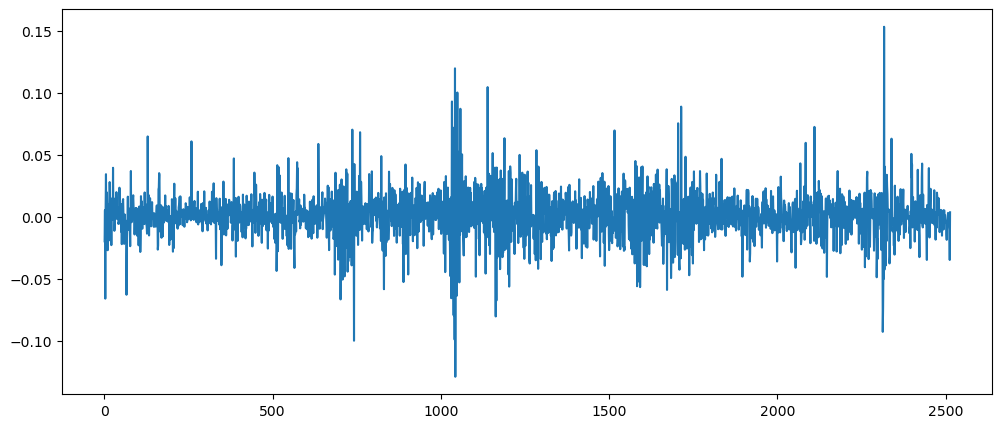

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# data preprocessing

In [27]:
df.shape

(2514, 9)

In [28]:
# splitting data into training and testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])

data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):])

print(data_training)

print(data_testing)


           Close
0      22.867064
1      22.420639
2      22.544641
3      21.063309
4      21.214373
...          ...
1754  128.787109
1755  131.506058
1756  131.427246
1757  132.757217
1758  133.919662

[1759 rows x 1 columns]
           Close
1759  133.200531
1760  133.259598
1761  135.820953
1762  139.012802
1763  140.411728
...          ...
2509  259.959991
2510  258.209991
2511  255.529999
2512  246.699997
2513  247.649994

[755 rows x 1 columns]


In [29]:
data_training

,Close
0,22.867064
1,22.420639
2,22.544641
3,21.063309
4,21.214373
...,...
1754,128.787109
1755,131.506058
1756,131.427246
1757,132.757217


In [30]:
data_testing

,Close
1759,133.200531
1760,133.259598
1761,135.820953
1762,139.012802
1763,140.411728
...,...
2509,259.959991
2510,258.209991
2511,255.529999
2512,246.699997


In [31]:
# scaling down the data between 0 and 1

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.014353  ],
       [0.01152155],
       [0.01230803],
       ...,
       [0.70289723],
       [0.71133258],
       [0.71870541]], shape=(1759, 1))

In [34]:
type(data_training_array)

numpy.ndarray

In [35]:
data_training_array.shape

(1759, 1)

# sequence creation

In [36]:
x_train = []
y_train = []

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [37]:
x_train

array([[[0.014353  ],
        [0.01152155],
        [0.01230803],
        ...,
        [0.01228124],
        [0.0101258 ],
        [0.01029944]],

       [[0.01152155],
        [0.01230803],
        [0.00291266],
        ...,
        [0.0101258 ],
        [0.01029944],
        [0.00983657]],

       [[0.01230803],
        [0.00291266],
        [0.00387079],
        ...,
        [0.01029944],
        [0.00983657],
        [0.01042964]],

       ...,

       [[0.93924318],
        [0.91460362],
        [0.91248261],
        ...,
        [0.68252795],
        [0.68615213],
        [0.70339709]],

       [[0.91460362],
        [0.91248261],
        [0.91435383],
        ...,
        [0.68615213],
        [0.70339709],
        [0.70289723]],

       [[0.91248261],
        [0.91435383],
        [0.92994871],
        ...,
        [0.70339709],
        [0.70289723],
        [0.71133258]]], shape=(1659, 100, 1))

In [38]:
x_train.ndim

3

In [39]:
y_train

array([0.00983657, 0.01042964, 0.00721829, ..., 0.70289723, 0.71133258,
       0.71870541], shape=(1659,))

In [40]:
y_train.ndim

1

In [41]:
x_train.shape

(1659, 100, 1)

In [42]:
y_train.shape

(1659,)

# model build

In [43]:
import tensorflow as tf

In [44]:
from keras.models import Sequential
from keras.layers import Dense , LSTM , Input

In [45]:
model = Sequential()

model.add(Input(shape=(100 , 1)))
model.add(LSTM(units=128 , activation='tanh' , return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# model training

In [46]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train , y_train , epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - loss: 0.0162
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 6.5992e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 6.4669e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 6.4831e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 5.8426e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 6.0104e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 5.4501e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 5.5118e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 5.3377e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 4.9292e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 4.7197e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 4.4673e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.0439e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 4.3788e-04
Epoch 

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [48]:
# save the trained model
model.save('stock_prediction_model.keras')

# preparing test data

In [49]:
data_testing

,Close
1759,133.200531
1760,133.259598
1761,135.820953
1762,139.012802
1763,140.411728
...,...
2509,259.959991
2510,258.209991
2511,255.529999
2512,246.699997


In [50]:
past_100_days = data_training.tail(100)

In [51]:
past_100_days

,Close
1659,164.766815
1660,167.225601
1661,160.921295
1662,158.718262
1663,156.288986
...,...
1754,128.787109
1755,131.506058
1756,131.427246
1757,132.757217


In [52]:
final_df = pd.concat([past_100_days , data_testing] , ignore_index=True)
final_df

,Close
0,164.766815
1,167.225601
2,160.921295
3,158.718262
4,156.288986
...,...
850,259.959991
851,258.209991
852,255.529999
853,246.699997


In [53]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.55200620e-01],
       [2.70282602e-01],
       [2.31612532e-01],
       [2.18099314e-01],
       [2.03198347e-01],
       [1.93003111e-01],
       [1.97467645e-01],
       [1.84497004e-01],
       [1.76774858e-01],
       [1.85401985e-01],
       [1.76352740e-01],
       [1.93907998e-01],
       [2.30466447e-01],
       [1.72612359e-01],
       [1.81480683e-01],
       [1.63744316e-01],
       [1.53669819e-01],
       [1.76473479e-01],
       [1.91072692e-01],
       [1.71888487e-01],
       [1.65976583e-01],
       [1.52040966e-01],
       [1.54092124e-01],
       [1.60064304e-01],
       [1.48481319e-01],
       [1.04080547e-01],
       [7.82602844e-02],
       [1.03899625e-01],
       [1.25919137e-01],
       [1.27728630e-01],
       [1.21877002e-01],
       [8.96623483e-02],
       [9.16531374e-02],
       [8.29657347e-02],
       [7.91049892e-02],
       [1.07157238e-01],
       [7.93461863e-02],
       [1.03658147e-01],
       [1.11742230e-01],
       [1.12405545e-01],


In [54]:
input_data.shape

(855, 1)

In [55]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test , y_test = np.array(x_test) , np.array(y_test)

In [56]:
x_test

array([[[0.25520062],
        [0.2702826 ],
        [0.23161253],
        ...,
        [0.05069857],
        [0.0588565 ],
        [0.06598684]],

       [[0.2702826 ],
        [0.23161253],
        [0.21809931],
        ...,
        [0.0588565 ],
        [0.06598684],
        [0.06157575]],

       [[0.23161253],
        [0.21809931],
        [0.20319835],
        ...,
        [0.06598684],
        [0.06157575],
        [0.06193806]],

       ...,

       [[0.6365656 ],
        [0.64974075],
        [0.6569718 ],
        ...,
        [0.84579331],
        [0.83910737],
        [0.82837302]],

       [[0.64974075],
        [0.6569718 ],
        [0.66965669],
        ...,
        [0.83910737],
        [0.82837302],
        [0.81193418]],

       [[0.6569718 ],
        [0.66965669],
        [0.66708289],
        ...,
        [0.82837302],
        [0.81193418],
        [0.75777171]]], shape=(755, 100, 1))

In [57]:
x_test[0].shape

(100, 1)

In [58]:
y_test

array([0.06157575, 0.06193806, 0.0776492 , 0.09722772, 0.10580861,
       0.10176002, 0.11444978, 0.12635389, 0.1086486 , 0.11644375,
       0.12333242, 0.15590293, 0.17814024, 0.16140189, 0.17904672,
       0.16254994, 0.15620506, 0.15844434, 0.17563196, 0.17169821,
       0.18458882, 0.17478472, 0.16776446, 0.14313277, 0.1457354 ,
       0.14870052, 0.13242088, 0.13974366, 0.13665714, 0.1239481 ,
       0.12757934, 0.15856536, 0.17551084, 0.16201503, 0.16970115,
       0.15590237, 0.14325388, 0.15517634, 0.1680064 , 0.17042736,
       0.1877359 , 0.18259157, 0.19711638, 0.20849401, 0.19971891,
       0.20637593, 0.21436464, 0.20244218, 0.19862936, 0.21751153,
       0.22713424, 0.24250628, 0.2501922 , 0.2469242 , 0.23560703,
       0.24105385, 0.22513709, 0.2176932 , 0.21345695, 0.24650068,
       0.24438241, 0.24450352, 0.25200815, 0.25902842, 0.25309724,
       0.24323258, 0.24510862, 0.23566768, 0.23560703, 0.26374875,
       0.27143468, 0.27088995, 0.26453543, 0.25793887, 0.24789

# making predictions

In [59]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


In [60]:
y_predicted

array([[0.05688734],
       [0.0604697 ],
       [0.06210202],
       [0.06732791],
       [0.07800748],
       [0.08981536],
       [0.09711879],
       [0.10486467],
       [0.11411028],
       [0.11512528],
       [0.11611533],
       [0.11902022],
       [0.13228936],
       [0.15172586],
       [0.16057323],
       [0.1697741 ],
       [0.1699427 ],
       [0.16558576],
       [0.16244699],
       [0.16678703],
       [0.17017739],
       [0.17684564],
       [0.1784797 ],
       [0.17582664],
       [0.16440056],
       [0.15589017],
       [0.1520641 ],
       [0.14520507],
       [0.14250751],
       [0.1407108 ],
       [0.13549322],
       [0.13236427],
       [0.14114596],
       [0.15592532],
       [0.16253017],
       [0.16736653],
       [0.16507421],
       [0.15738799],
       [0.15516596],
       [0.15953285],
       [0.16498914],
       [0.17504618],
       [0.18089487],
       [0.18888518],
       [0.19865987],
       [0.20202725],
       [0.20509401],
       [0.209

In [61]:
y_test

array([0.06157575, 0.06193806, 0.0776492 , 0.09722772, 0.10580861,
       0.10176002, 0.11444978, 0.12635389, 0.1086486 , 0.11644375,
       0.12333242, 0.15590293, 0.17814024, 0.16140189, 0.17904672,
       0.16254994, 0.15620506, 0.15844434, 0.17563196, 0.17169821,
       0.18458882, 0.17478472, 0.16776446, 0.14313277, 0.1457354 ,
       0.14870052, 0.13242088, 0.13974366, 0.13665714, 0.1239481 ,
       0.12757934, 0.15856536, 0.17551084, 0.16201503, 0.16970115,
       0.15590237, 0.14325388, 0.15517634, 0.1680064 , 0.17042736,
       0.1877359 , 0.18259157, 0.19711638, 0.20849401, 0.19971891,
       0.20637593, 0.21436464, 0.20244218, 0.19862936, 0.21751153,
       0.22713424, 0.24250628, 0.2501922 , 0.2469242 , 0.23560703,
       0.24105385, 0.22513709, 0.2176932 , 0.21345695, 0.24650068,
       0.24438241, 0.24450352, 0.25200815, 0.25902842, 0.25309724,
       0.24323258, 0.24510862, 0.23566768, 0.23560703, 0.26374875,
       0.27143468, 0.27088995, 0.26453543, 0.25793887, 0.24789

In [62]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1 , 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1 , 1)).flatten()

In [63]:
y_predicted

array([132.43619, 133.02022, 133.28633, 134.13829, 135.87936, 137.80437,
       138.99504, 140.25784, 141.76514, 141.9306 , 142.09201, 142.5656 ,
       144.72884, 147.89752, 149.3399 , 150.8399 , 150.86739, 150.15707,
       149.64537, 150.35292, 150.90565, 151.99275, 152.25916, 151.82663,
       149.96387, 148.57643, 147.95267, 146.83446, 146.39468, 146.10176,
       145.25116, 144.74104, 146.1727 , 148.58215, 149.65894, 150.44739,
       150.07368, 148.82062, 148.45836, 149.17029, 150.05981, 151.69939,
       152.6529 , 153.95554, 155.54909, 156.09807, 156.59802, 157.38393,
       157.21696, 156.67181, 157.404  , 158.76443, 160.74298, 162.60867,
       163.5109 , 163.10132, 162.90898, 161.81488, 160.50233, 159.40291,
       160.87352, 162.23459, 163.06833, 163.93549, 164.90825, 165.11201,
       164.41301, 163.9188 , 163.05219, 162.46062, 163.99635, 165.91096,
       167.12032, 167.25331, 166.64699, 165.45671, 167.76614, 169.86806,
       170.36281, 171.05687, 171.56262, 171.4194 , 

In [64]:
y_test

array([133.20053101, 133.25959778, 135.82095337, 139.01280212,
       140.41172791, 139.75169373, 141.82048035, 143.76118469,
       140.87472534, 142.14555359, 143.26860046, 148.57850647,
       152.20381165, 149.47499084, 152.35159302, 149.66215515,
       148.62776184, 148.99282837, 151.79489136, 151.15357971,
       153.25511169, 151.6567688 , 150.51226807, 146.49661255,
       146.9209137 , 147.40431213, 144.75027466, 145.9440918 ,
       145.44090271, 143.36897278, 143.96096802, 149.01255798,
       151.77514648, 149.57495117, 150.82800293, 148.57841492,
       146.51635742, 148.46005249, 150.55171204, 150.94639587,
       153.76817322, 152.92950439, 155.29745483, 157.15232849,
       155.72174072, 156.80702209, 158.10940552, 156.16571045,
       155.54411316, 158.62243652, 160.19120789, 162.69728088,
       163.95030212, 163.41752625, 161.57250977, 162.460495  ,
       159.86561584, 158.65205383, 157.96142578, 163.34848022,
       163.00314331, 163.02288818, 164.24635315, 165.39

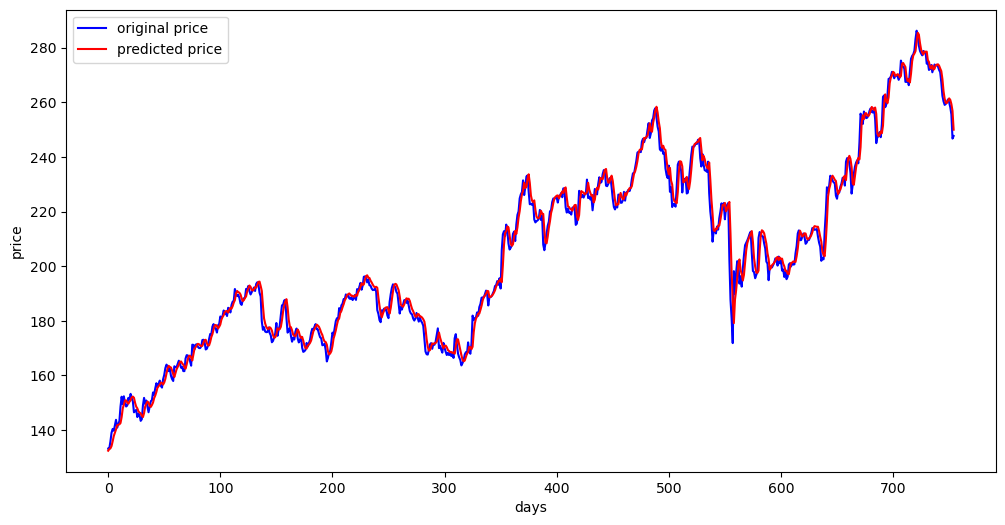

In [65]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='original price')
plt.plot(y_predicted , 'r' , label='predicted price')
plt.xlabel('days')
plt.ylabel('price')
plt.legend()

(170.0, 270.0)

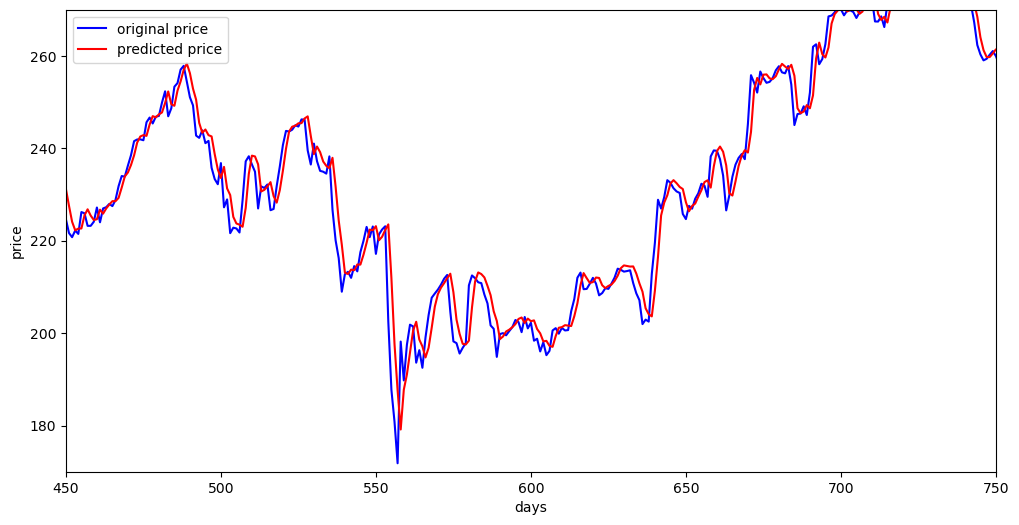

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label='original price')
plt.plot(y_predicted , 'r' , label='predicted price')
plt.xlabel('days')
plt.ylabel('price')
plt.legend()
plt.xlim(450 , 750)
plt.ylim(170 , 270)

# model evaluation

In [69]:
# mean squared error (MSE)

# lower MSE means your predictions is closer to the actual values

In [74]:
from sklearn.metrics import mean_squared_error , r2_score

In [75]:
mse = mean_squared_error(y_test , y_predicted)
print(f"mean squared error (MSE): {mse}")

mean squared error (MSE): 14.034990085309845


In [76]:
# root mean squared error (RMSE)

# a lower RMSE incdicate that our model is good

In [77]:
rmse = np.sqrt(mse)
print(f"root mean squared error (RMSE): {rmse}")

root mean squared error (RMSE): 3.7463302157324367


In [79]:
# r-squared 

# r-squared measures how well your models predictions match the actual values 
# so r-squared should be in between 0 and 1 if it is close to 1 it means our prediction is very good

In [80]:
r2 = r2_score(y_test , y_predicted)
print(f"r-squared: {r2}")

r-squared: 0.9878566476816457
